# 필수과제 2
- NH고객데이터의 군집에 대한 평가를 진행 후 적정 군집에 대한 기준을 선정(필수)
- 모든 변수를 다 사용해도 되고, 피처에대한 중요성을 확인해서 변수를 먼저 추출하고 난 후에 진행도 됩니다. ( 피처에 대한 중요도는 자율)
- 오늘 배운 군집화를 진행하는 과정에서의 근거 코드로 작성 (필수)

- 필수적으로 공유해야 하는 것 (필수)
- 1. 군집의 개수를 선정한 기준에 대한 설명 및 코드 ( 주석 필수 )
- 2. 해당 군집에 대한 특성 비교 
- 3. 군집에 대한 인사이트를 통해서 마케팅이건, 세일즈건 어떤 전략을 펼칠 수 있는지? 
- ( 단순하게 나열 형식으로 투자성향이 높은 사람은 무엇을 해야 한다 이런 식보다는 좀 더 데이터 근거 + 외부나 비정형데이터를 통해서 같이 전략을 제안하는 것)

In [37]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.float_format='{:.8f}'.format

######데이터주소
df=pd.read_csv("C:/Min/개인공부/BDA 6기/데이터/NH거래고객데이터.csv")

In [38]:
df.head()

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16


In [39]:
df.info()
#결측치 없는 수치형 데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   계좌          10000 non-null  object
 2   성별          10000 non-null  int64 
 3   연령구간        10000 non-null  int64 
 4   투자성향        10000 non-null  int64 
 5   고객자산구간      10000 non-null  int64 
 6   주거래상품군      10000 non-null  int64 
 7   LIFESTAGE   10000 non-null  int64 
 8   고객등급        10000 non-null  int64 
 9   총투자기간       10000 non-null  int64 
 10  주거래업종구분     10000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 859.5+ KB


In [40]:
df.columns

Index(['Unnamed: 0', '계좌', '성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군',
       'LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분'],
      dtype='object')

In [41]:
#필요 없는 컬럼 버리기
df=df[['성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군','LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분']]

In [42]:
#시각화 시 한글 안깨지도록
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

In [43]:
df['투자성향'].unique()

array([99,  4,  2,  3,  5,  1,  9,  0], dtype=int64)

In [44]:
#전체데이터의 분포 확인 위해 모든 컬럼의 미정의 및 결측치 카테고리 제거
df=df[(df['투자성향']!=00)&(df['투자성향']!=99)&(df['주거래상품군']!=99)&(df['고객등급']!=99)&(df['고객등급']!=9)]

In [45]:
#변수 선택을 위한 변수간 상관관계 확인
df.corr()

,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
성별,1.00000000,0.04845110,-0.14195447,-0.02822283,0.01365247,0.16558531,0.08189176,-0.01821095,0.01389758
연령구간,0.04845110,1.00000000,0.08471464,0.28446934,-0.01745979,0.85653716,-0.26256894,0.22177818,-0.00689210
투자성향,-0.14195447,0.08471464,1.00000000,0.21601579,0.02418538,0.05878307,-0.26507493,0.18874032,0.02180285
고객자산구간,-0.02822283,0.28446934,0.21601579,1.00000000,0.02532714,0.26176876,-0.78689068,0.20400683,-0.03655221
주거래상품군,0.01365247,-0.01745979,0.02418538,0.02532714,1.00000000,-0.01829229,-0.07605349,0.05958083,0.01889410
LIFESTAGE,0.16558531,0.85653716,0.05878307,0.26176876,-0.01829229,1.00000000,-0.22989365,0.17042491,0.00406459
고객등급,0.08189176,-0.26256894,-0.26507493,-0.78689068,-0.07605349,-0.22989365,1.00000000,-0.24395396,0.01378836
총투자기간,-0.01821095,0.22177818,0.18874032,0.20400683,0.05958083,0.17042491,-0.24395396,1.00000000,0.05447967
주거래업종구분,0.01389758,-0.00689210,0.02180285,-0.03655221,0.01889410,0.00406459,0.01378836,0.05447967,1.00000000


# 변수 선택
- 군집화를 잘 하려면 ? -> 기업이 중요시하는 컬럼이면서 고객을 명확히 구분할 수 있는 변수
- LIFESTAGE : 기업에서 만든 자체 변수이기에 신뢰도 높으며 카테고리마다 많은 정보를 갖고 있어 필수적
- 연령구간 : LIFESTAGE와 높은 상관관계를 갖고 있어 클러스터링에서 도움될 것이라 예상됨
- 고객등급&고객자산구간 : 높은 상관관계를 가져 둘다 클러스터링에서 도움될 것이라 예상됨
- 이외 변수들은 높은 상관관계를 갖지 못하였기에 탈락됨

In [46]:
# 위 결과에 따라 상관계수를 바탕으로 계수가 높은 컬럼으로 구성
df_sp=df[['연령구간', '고객등급', '고객자산구간', 'LIFESTAGE']]

In [47]:
df_sp.head()

,연령구간,고객등급,고객자산구간,LIFESTAGE
1,6,2,4,5
2,7,5,3,5
3,6,3,4,5
4,5,5,2,5
5,5,4,4,5


In [48]:
df_sp.describe()

,연령구간,고객등급,고객자산구간,LIFESTAGE
count,4380.00000000,4380.00000000,4380.00000000,4380.00000000
mean,4.80433790,4.00433790,3.15707763,4.51278539
std,2.04177191,0.98665653,1.41566051,1.85623284
min,1.00000000,1.00000000,1.00000000,2.00000000
25%,3.00000000,3.00000000,2.00000000,3.00000000
50%,5.00000000,4.00000000,3.00000000,5.00000000
75%,6.00000000,5.00000000,4.00000000,5.00000000
max,9.00000000,5.00000000,6.00000000,9.00000000


In [49]:
# 컬럼마다 단위 및 간격 의미 다르기 때문에 스케일링 진행

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df_scaled = sc.fit_transform(df_sp)
pd.DataFrame(df_scaled)
df_sp_sc=pd.DataFrame(df_scaled, columns=df_sp.columns)

In [50]:
df_sp_sc

,연령구간,고객등급,고객자산구간,LIFESTAGE
0,0.58566709,-2.03167635,0.59549490,0.26250491
1,1.07549368,1.00924258,-0.11096980,0.26250491
2,0.58566709,-1.01803671,0.59549490,0.26250491
3,0.09584050,1.00924258,-0.81743450,0.26250491
4,0.09584050,-0.00439707,0.59549490,0.26250491
...,...,...,...,...
4375,-0.39398609,1.00924258,-1.52389919,-0.27628211
4376,-0.88381268,1.00924258,-1.52389919,-0.81506914
4377,0.58566709,1.00924258,-1.52389919,1.34007897
4378,2.05514687,1.00924258,-0.81743450,2.41765302


In [51]:
df_scaled

array([[ 0.58566709, -2.03167635,  0.5954949 ,  0.26250491],
       [ 1.07549368,  1.00924258, -0.1109698 ,  0.26250491],
       [ 0.58566709, -1.01803671,  0.5954949 ,  0.26250491],
       ...,
       [ 0.58566709,  1.00924258, -1.52389919,  1.34007897],
       [ 2.05514687,  1.00924258, -0.8174345 ,  2.41765302],
       [ 1.07549368,  1.00924258, -0.8174345 ,  0.26250491]])

# 클러스터링 개수 정하기

17520.000000000025
10519.690156445115
7153.559683982564
5655.777378551239
4818.898194511855
4285.748879963209
3855.7592215910295
3532.170233051862


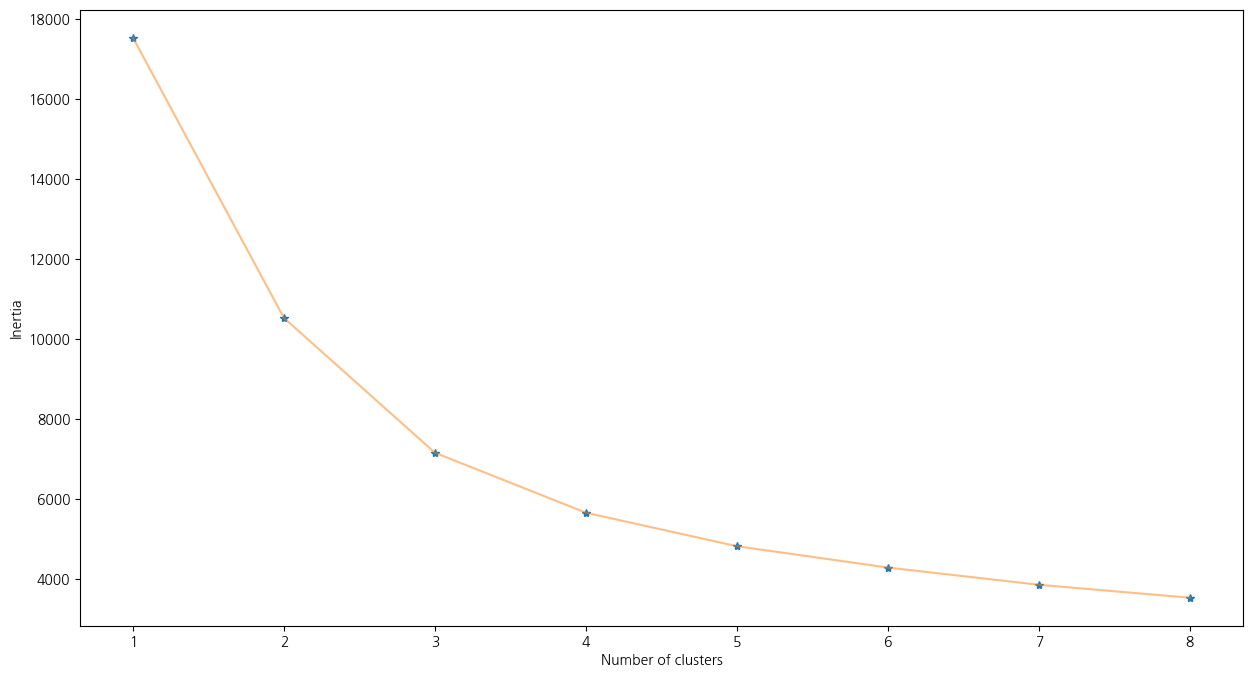

In [52]:
# 엘보우 기법
from sklearn.cluster import KMeans
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, '*')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

n_clusters = [1,2,3,4,5,6,7,8]
change_n_clusters(n_clusters, df_scaled)
# 3에서부터 기울기 달라지는 것으로 보임

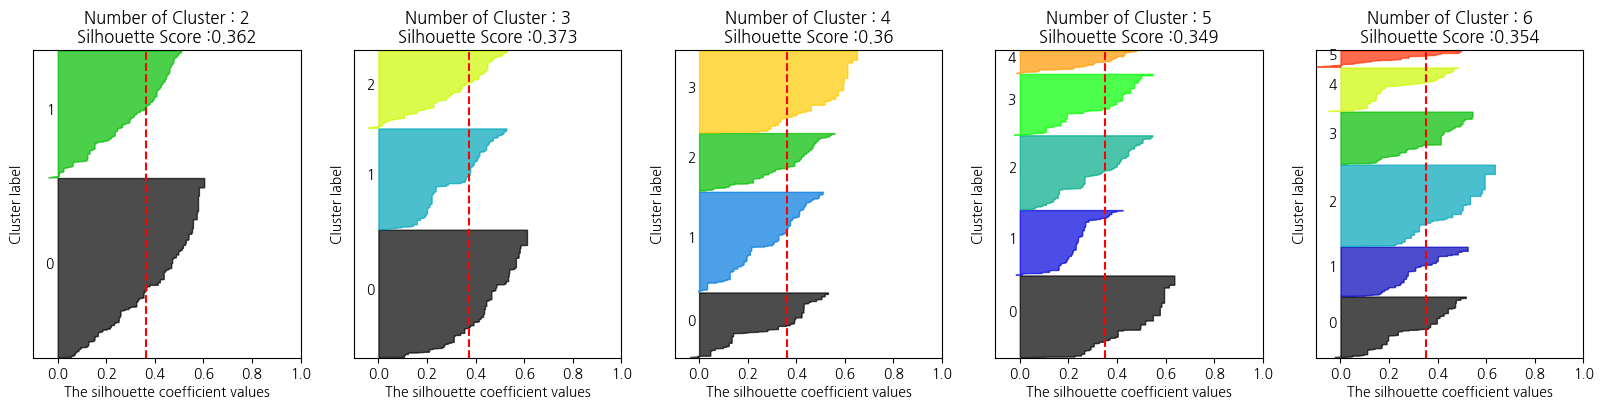

In [53]:
# 실루엣 계수로 재확인

def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2,3,4,5,6], df_scaled)

#실루엣 계수의 평균이 가장 큰 Number of cluster 3 가 적절해보임.

In [54]:
kmeans = KMeans(n_clusters=3, random_state=111)
clusters = kmeans.fit(df_scaled)
df_sp_sc['cluster'] = clusters.labels_

In [55]:
from sklearn.decomposition import PCA

X = df_scaled.copy()

# PCA 적용
pca = PCA(n_components = 2)
pca.fit(X)

x_pca = pca.transform(X)
x_pca

array([[ 1.69941212,  0.96809231],
       [ 0.16072825, -1.22509563],
       [ 1.21647071,  0.43260405],
       ...,
       [-0.23682571, -2.2408773 ],
       [ 1.42666273, -3.10955795],
       [-0.18505475, -1.58138044]])

In [56]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] =df_sp_sc['cluster']

C:\Users\gram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gram\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


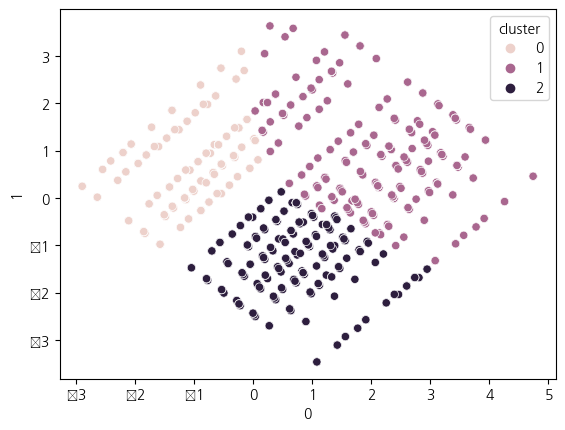

In [57]:
axs = plt.subplots()
axs = sns.scatterplot(0,1, hue='cluster',data=pca_df)

#클러스터 간 경계 뚜렷한 걸로 보아 클러스터링 결과 신뢰감

In [58]:
# 샘플데이터에 클러스터 레이블 넣기
df_sp['cluster']=kmeans.labels_

C:\Temp\ipykernel_37364\3687415353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['cluster']=kmeans.labels_


In [59]:
# 클러스터별 개수 확인
df_sp.groupby(['cluster']).count()

,연령구간,고객등급,고객자산구간,LIFESTAGE
cluster,,,,
0,1828,1828,1828,1828
1,1109,1109,1109,1109
2,1443,1443,1443,1443


In [65]:
#각 컬럼을 기준으로 클러스터별 결과 비교 및 확인
df_sp.groupby(['cluster','연령구간']).count()

고객등급  고객자산구간  LIFESTAGE
cluster 연령구간                         
0       1      107     107        107
        2      525     525        525
        3      627     627        627
        4      569     569        569
1       1        1       1          1
        2        4       4          4
        3       76      76         76
        4      181     181        181
        5      214     214        214
        6      222     222        222
        7      198     198        198
        8      149     149        149
        9       64      64         64
2       5      448     448        448
        6      393     393        393
        7      298     298        298
        8      208     208        208
        9       96      96         96

In [61]:
df_sp.groupby(['cluster','고객등급']).count()

연령구간  고객자산구간  LIFESTAGE
cluster 고객등급                         
0       2        4       4          4
        3      123     123        123
        4      735     735        735
        5      966     966        966
1       1       67      67         67
        2      274     274        274
        3      707     707        707
        4       61      61         61
2       2        2       2          2
        3       50      50         50
        4      697     697        697
        5      694     694        694

In [62]:
df_sp.groupby(['cluster','고객자산구간']).count()

연령구간  고객등급  LIFESTAGE
cluster 고객자산구간                       
0       1        237   237        237
        2        886   886        886
        3        358   358        358
        4        287   287        287
        5         59    59         59
        6          1     1          1
1       1          1     1          1
        2          2     2          2
        3         43    43         43
        4        197   197        197
        5        615   615        615
        6        251   251        251
2       1        151   151        151
        2        598   598        598
        3        344   344        344
        4        337   337        337
        5         12    12         12
        6          1     1          1

In [63]:
df_sp.groupby(['cluster','LIFESTAGE']).count()

연령구간  고객등급  고객자산구간
cluster LIFESTAGE                    
0       2           632   632     632
        3           822   822     822
        4           374   374     374
1       2             5     5       5
        3           195   195     195
        4            62    62      62
        5           438   438     438
        6           105   105     105
        7           186   186     186
        8            54    54      54
        9            64    64      64
2       5           805   805     805
        6           204   204     204
        7           250   250     250
        8            88    88      88
        9            96    96      96

- 연령구간 
    1. 0(56748) 
    2. 1(3>4>2) 
    3. 2(5>6>7>8)
    
- 고객등급 
    1. 0(3>>2) 
    2. 1(5>4) 
    3. 2(4>=5)
    
- 고객자산구간 
    1. 0(5>>6>4) 
    2. 1(2>>3>4>1) 
    3. 2(2>4>3)
   
- LIFESTAGE 
    1. 0(5>>3>>7) 
    2. 1(3>>2>>4) 
    3. 2(5>>>7>6) 
    
#### 클러스터 별 특징과 마케팅 전략

- 클러스터 0 : 초년생 ~ 가족 성숙기 남성 

    1 )
    
    2 )
    
    3 ) 


- 클러스터 1 : 20-39 mz세대

    １）  
    
    ２）
        

- 클러스터 2 : 40-59 직장인남성, 주부여성, 기타남성

    1 ) 
    
    2 ) 
    
    3 )
